# Nikita Tejwani
### HUDK 4050: Core Methods in Educational Data Mining
### Fall 2021

##### *Assignment 6: Individual Coding Assignment (ICE) 6*

In [2]:
#Import all relevant packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

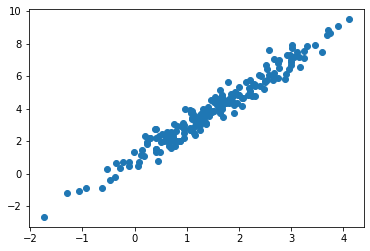

In [3]:
np.random.seed(123)

#Generate a set of x values with a mean of 1 and standard deviation of 1.5
#Generate residual values for each point
#Generate y values for each x value for a regression line y = 2x + 1, adding residual values to introduce some variation from the line
x = np.random.randn(200) + 1.5
res = 0.5 * np.random.randn(200)
y = 2 * x + 1 + res

plt.scatter(x, y)

In [9]:
#Describe the dataset using PCA
df = np.c_[x, y]
pca = PCA(n_components = 2)
pca.fit(df)

#PCA components indicate the (x, y) vectors which are principal axes of the dataset
print("PCA Components:\n", pca.components_, "\n")
print("Variance explained by components:\n", pca.explained_variance_)

#Results show that the first vector, which points down and to the left, explains most of the variance
#Second vector is orthogonal to the first

PCA Components:
 [[-0.43316568 -0.90131431]
 [-0.90131431  0.43316568]] 

Variance explained by components:
 [5.75175781 0.04167795]


In [15]:
#Affine transformation: translation, rotation, uniform scaling
pca = PCA(n_components = 1)
pca.fit(df)
df_derived = pca.transform(df)
print("Original shape: ", df.shape)
print("New shape: ", df_derived.shape)

Original shape:  (200, 2)
New shape:  (200, 1)


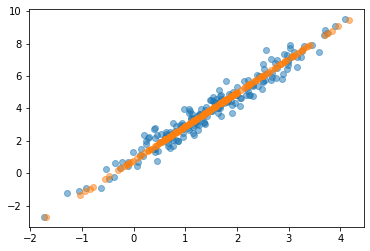

In [17]:
#Inverse transformation
df_derived2 = pca.inverse_transform(df_derived)
plt.scatter(df[:, 0], df[:, 1], alpha = 0.5)
plt.scatter(df_derived2[:, 0], df_derived2[:, 1], alpha = 0.5)

#Maintains relationship between points without showing complete information

In [35]:
#Import data and normalize it
#Perform component analysis
data = pd.read_csv('ICE6_Data.csv')
data_normalized = data.drop('id', axis = 1)
data_normalized = (data_normalized - data_normalized.min()) / (data_normalized.max() - data_normalized.min())
pca = PCA(n_components = 7)
pca.fit(data_normalized)

print("PCA Components:\n", pca.components_, "\n")
print("Variance explained by components:\n", pca.explained_variance_)
#Component analysis suggests that there are two vectors that explain the most variance
#The vector components suggest that columns 4, 5, and 1 explain a great deal of variance
#These are 'mean_correct', 'mean_hint', and 'prior_prob_count'

PCA Components:
 [[ 0.03210197 -0.24096527  0.04948142 -0.75124102  0.60531063  0.05885487
  -0.06502965]
 [ 0.73523433  0.19818155  0.33196771  0.3267956   0.42515593  0.07380564
   0.13019906]
 [-0.03508933  0.10865855  0.2720886   0.08347196  0.02353831  0.00730292
  -0.95150139]
 [ 0.63502075 -0.11884565 -0.61180938 -0.21309443 -0.31231208 -0.09064925
  -0.23905706]
 [-0.04316651  0.93258475 -0.10922013 -0.33523805 -0.02506782 -0.0362411
   0.04655037]
 [ 0.22736222 -0.0823569   0.65253152 -0.40249791 -0.57700547 -0.08198832
   0.11859346]
 [ 0.01898415  0.01522709 -0.03577263 -0.04555924 -0.14555024  0.98731085
  -0.00921028]] 

Variance explained by components:
 [0.09323141 0.05050618 0.03978718 0.03248282 0.02558307 0.01550987
 0.00437146]


array([[<AxesSubplot:xlabel='prior_prob_count', ylabel='prior_prob_count'>,
        <AxesSubplot:xlabel='mean_correct', ylabel='prior_prob_count'>,
        <AxesSubplot:xlabel='mean_hint', ylabel='prior_prob_count'>],
       [<AxesSubplot:xlabel='prior_prob_count', ylabel='mean_correct'>,
        <AxesSubplot:xlabel='mean_correct', ylabel='mean_correct'>,
        <AxesSubplot:xlabel='mean_hint', ylabel='mean_correct'>],
       [<AxesSubplot:xlabel='prior_prob_count', ylabel='mean_hint'>,
        <AxesSubplot:xlabel='mean_correct', ylabel='mean_hint'>,
        <AxesSubplot:xlabel='mean_hint', ylabel='mean_hint'>]],
      dtype=object)

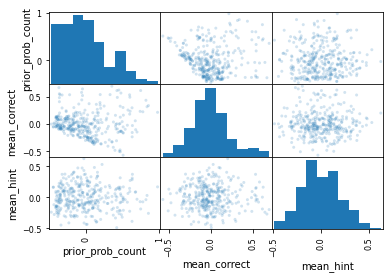

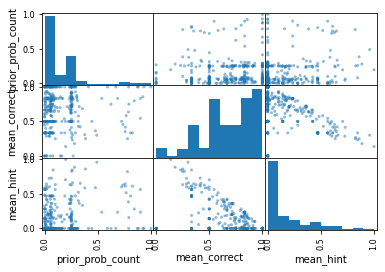

In [41]:
pca = PCA(n_components = 3)
pca.fit(data_normalized)
data_derived = pca.transform(data_normalized)
pd.plotting.scatter_matrix(pd.DataFrame(data_derived, columns = ['prior_prob_count', 'mean_correct', 'mean_hint']), alpha = 0.2)
#The plot of the PCA data, fitted to the three seemingly important variables, does not reveal much

pd.plotting.scatter_matrix(data_normalized[['prior_prob_count', 'mean_correct', 'mean_hint']])
#The plot of the seemingly important variables reveals a negative relationship between mean_hint and mean_correct